# Hypothesis Testing

### Importing the libraries and dataset

In [1]:
# importing the libraries and the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from scipy import stats
sns.set_palette("Blues")

In [2]:
# checking the current working directory
current_directory = os.getcwd()
print(current_directory)
two_directories_back = os.path.abspath(os.path.join(current_directory, "../.."))

D:\Classes\Capstone Project\Supply-Chain-Modeling-and-Analysis\src\Hypothesis Testing


In [3]:
# changing the working directory
os.chdir(two_directories_back)
current_directory = os.getcwd()
print(current_directory)

D:\Classes\Capstone Project\Supply-Chain-Modeling-and-Analysis


In [4]:
# reading the dataset
data = pd.read_csv("data/DataCoSupplyChainDataset.csv", encoding='latin-1')

### Functions for experiments

#### Independent two-way t-test

In [5]:
# return t-statistics and p-values
def indedpend_t_test(group1, group2):
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    return t_statistic, p_value

#### One-way ANOVA

In [6]:
# return t-statistics and p-values
def one_way_anova(*args):
    f_statistic, p_value = stats.f_oneway(*args)
    return f_statistic, p_value

#### Perason Correlation test

In [7]:
def perason_correlation_test(group1, group2):
    f_statistic, p_value = stats.pearsonr(group1, group2)
    return f_statistic, p_value

### Hypothesis 1: Impact of delivery time on order profitability

<b>Null Hypothesis:</b> There is no difference on profitability if the product arrived on time or not. <br>
<b>Alternative Hypothesis:</b> There is a difference on profitability if the product arrived on time or not.

In [8]:
# difference between the scheduled shipment time and real shipment time
data["delivery_time_difference"] = data["Days for shipping (real)"] - data["Days for shipment (scheduled)"]

In [9]:
# assigning a flag to categorize if the parcel is delayed or not
data["flag_delay"] = data["delivery_time_difference"].apply(lambda x: 1 if x<0 else 0)

In [10]:
# separating the two groups and extracting only the profits
data_delayed = data.query("flag_delay==0")["Order Profit Per Order"]
data_not_delayed = data.query("flag_delay==1")["Order Profit Per Order"]

In [11]:
# calling the two-way independent t-test functions
t_stats, p_value = indedpend_t_test(data_delayed, data_not_delayed)
print("t-statistics: ", t_stats)
print("p-value: ", p_value)

t-statistics:  -1.1313151667159131
p-value:  0.2579239658902995


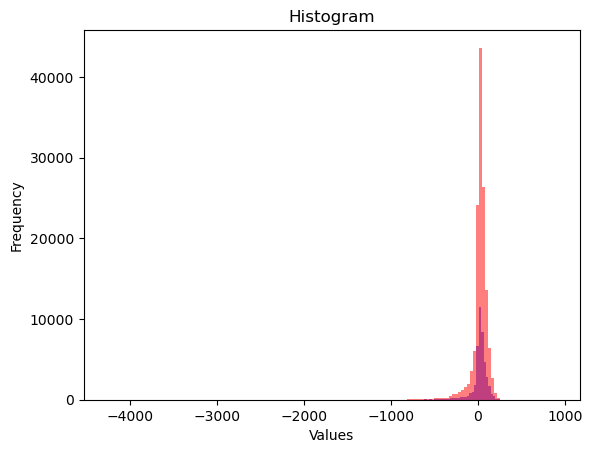

In [29]:
# plotting the two distributions
plt.hist(data_not_delayed, bins=150, color='blue',alpha=0.5)
plt.hist(data_delayed, bins=150, color='red',alpha=0.5)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

<b>Observation:</b> Since the p-value is not less that 0.05, at 0.05 level of significance we failed to reject the null hypothesis.

### Hypothesis 2: Relationship between sales per customer and delivery status

<b>Null Hypothesis:</b> There is no difference in sales per customer on based on delivery status.<br>
<b>Alternative Hypothesis:</b> There is a difference in sales per customer on based on delivery status. 

In [31]:
# creating different groups
advanced_shipping = data.query("`Delivery Status` == 'Advance shipping'")["Sales per customer"]
late_delivery = data.query("`Delivery Status` == 'Late delivery'")["Sales per customer"]
shipping_on_time = data.query("`Delivery Status` == 'Shipping on time'")["Sales per customer"]
shipping_canceled = data.query("`Delivery Status` == 'Shipping canceled'")["Sales per customer"]

In [32]:
# calling one-way ANOVA test to see the difference between any groups
t_stats, p_value = one_way_anova(advanced_shipping, late_delivery, shipping_on_time, shipping_canceled)
print("t-statistics: ", t_stats)
print("p-value: ", p_value)

t-statistics:  1.6854814873252777
p-value:  0.1677144228848012


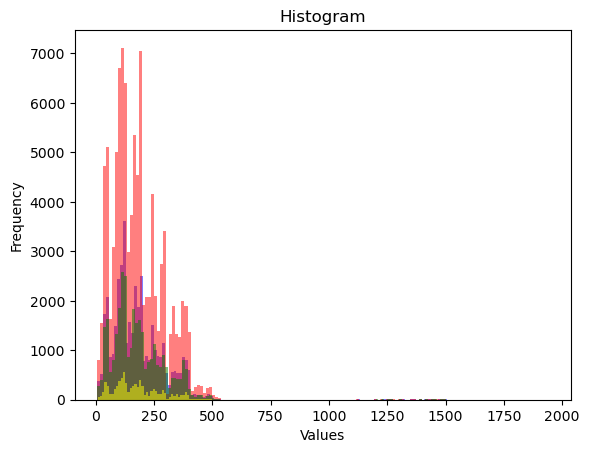

In [33]:
# plotting the four distributions
plt.hist(advanced_shipping, bins=150, color='blue',alpha=0.5)
plt.hist(late_delivery, bins=150, color='red',alpha=0.5)
plt.hist(shipping_on_time, bins=150, color='green',alpha=0.5)
plt.hist(shipping_canceled, bins=150, color='yellow',alpha=0.5)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

<b>Observation:</b> Since the p-value is not less that 0.05, at 0.05 level of significance we failed to reject the null hypothesis.

### Hypothesis 3: Impact of late delivery risk on order profit

In [35]:
# creating different groups for t-test
late_delivery = data.query("Late_delivery_risk == 1")["Order Profit Per Order"]
ontime_delivery = data.query("Late_delivery_risk == 0")["Order Profit Per Order"]

In [36]:
# calling independent t-test to see the difference between any groups
t_stats, p_value = indedpend_t_test(late_delivery, ontime_delivery)
print("t-statistics: ", t_stats)
print("p-value: ", p_value)

t-statistics:  -1.5835107341059376
p-value:  0.11330685383692102


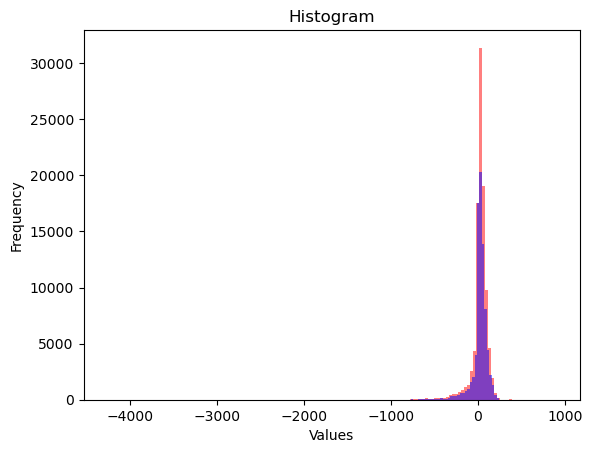

In [38]:
# plotting the four distributions
plt.hist(late_delivery, bins=150, color='red',alpha=0.5)
plt.hist(ontime_delivery, bins=150, color='blue',alpha=0.5)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

<b>Observation:</b> Since the p-value is not less that 0.05, at 0.05 level of significance we failed to reject the null hypothesis.

### Hypothesis 4: Relationship between product price and sales

In [45]:
# calling independent t-test to see the difference between any groups
t_stats, p_value = perason_correlation_test(data['Product Price'].values, data['Sales per customer'].values)
print("t-statistics: ", t_stats)
print("p-value: ", p_value)

t-statistics:  0.7817814277171907
p-value:  0.0


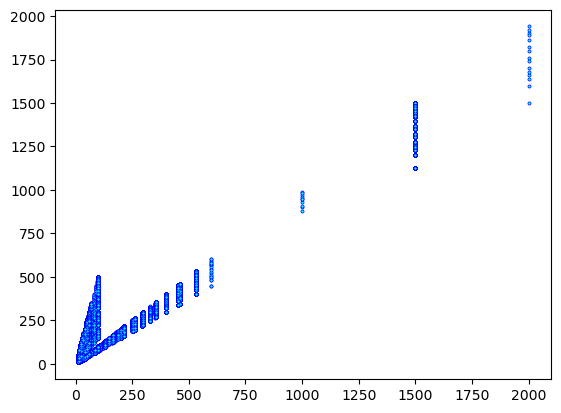

In [50]:
# plotting the scatterplot
plt.scatter(data['Product Price'].values, 
            data['Sales per customer'].values, 
            color='cyan', 
            s=5, 
            edgecolor='blue', 
            linewidth=0.5)

<b>Observation:</b> Since the p-value is less that 0.05, at 0.05 level of significance we reject the null hypothesis.

### Hypothesis 5: Impact of shipping mode on order profitability

In [39]:
# splitting the dataset into different groups
standard_class = data.query('`Shipping Mode` == "Standard Class"')['Order Profit Per Order']
first_class = data.query('`Shipping Mode` == "First Class"')['Order Profit Per Order']
second_class = data.query('`Shipping Mode` == "Second Class"')['Order Profit Per Order']
same_day = data.query('`Shipping Mode` == "Same Day"')['Order Profit Per Order']

In [40]:
# calling one-way ANOVA test to see the difference between any groups
t_stats, p_value = one_way_anova(standard_class, first_class, second_class, same_day)
print("t-statistics: ", t_stats)
print("p-value: ", p_value)

t-statistics:  1.9791817108864243
p-value:  0.11469269801389084


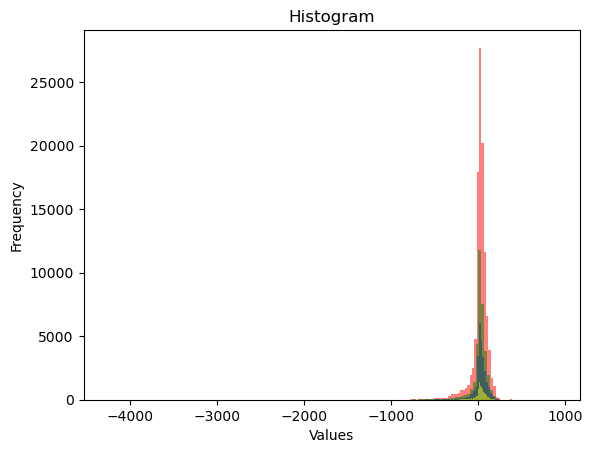

In [41]:
# plotting the four distributions
plt.hist(standard_class, bins=150, color='red',alpha=0.5)
plt.hist(first_class, bins=150, color='blue',alpha=0.5)
plt.hist(second_class, bins=150, color='green',alpha=0.5)
plt.hist(same_day, bins=150, color='yellow',alpha=0.5)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

<b>Observation:</b> Since the p-value is not less that 0.05, at 0.05 level of significance we failed to reject the null hypothesis.